In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import warnings
from statistics import median


import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv("2019_partnerships_ipl.csv")
df.head()


,index,team,player_1,player_2,score_1,score_2
0,0,Chennai Super Kings,AT Rayudu,SR Watson,7,0
1,1,Chennai Super Kings,AT Rayudu,SK Raina,12,19
2,2,Chennai Super Kings,AT Rayudu,KM Jadhav,9,9
3,3,Chennai Super Kings,RA Jadeja,KM Jadhav,6,4
4,19,Sunrisers Hyderabad,DA Warner,JM Bairstow,74,39


In [ ]:

df_dc = df[df['team']=="Mumbai Indians"]

df_dc['partners'] = [sorted([i,j]) for i,j in zip(df_dc['player_1'], df_dc['player_2'])]
df_dc['partnership'] = ["".join(i) for i in df_dc['partners']]

df_dc.head()

,index,team,player_1,player_2,score_1,score_2,partners,partnership
8,23,Mumbai Indians,RG Sharma,Q de Kock,14,18,"[Q de Kock, RG Sharma]",Q de KockRG Sharma
9,24,Mumbai Indians,Q de Kock,SA Yadav,1,2,"[Q de Kock, SA Yadav]",Q de KockSA Yadav
10,25,Mumbai Indians,Yuvraj Singh,Q de Kock,0,8,"[Q de Kock, Yuvraj Singh]",Q de KockYuvraj Singh
11,26,Mumbai Indians,Yuvraj Singh,KA Pollard,28,21,"[KA Pollard, Yuvraj Singh]",KA PollardYuvraj Singh
12,27,Mumbai Indians,Yuvraj Singh,HH Pandya,0,0,"[HH Pandya, Yuvraj Singh]",HH PandyaYuvraj Singh


In [ ]:

p1 = []
p2 = []

r1 = []
r2 = []

for p in df_dc['partnership'].unique():
    
    temp = df_dc[df_dc['partnership'] == p]
    p1.append(temp.iloc[0]['player_1'])
    p2.append(temp.iloc[0]['player_2'])
    
    a = []
    b = []
    

    for index, row in temp.iterrows():

        a.append(row['score_1'])
        

        b.append(row['score_2'])


    r1.append(median(a))
    r2.append(median(b))

In [ ]:

team_df = pd.DataFrame({'p1':p1, 'p2':p2, 'r1':r1, 'r2':r2})
team_df.head()


,p1,p2,r1,r2
0,RG Sharma,Q de Kock,14.0,18.0
1,Q de Kock,SA Yadav,6.0,9.0
2,Yuvraj Singh,Q de Kock,7.5,24.5
3,Yuvraj Singh,KA Pollard,15.5,11.5
4,Yuvraj Singh,HH Pandya,0.0,0.0


In [ ]:

team_df['lead'] = np.where(team_df['r1'] >= team_df['r2'], team_df['p1'], team_df['p2'])
team_df['follower'] = np.where(team_df['lead'] == team_df['p1'], team_df['p2'], team_df['p1'])
team_df['larger_score'] = np.where(team_df['r1'] >= team_df['r2'], team_df['r1'], team_df['r2'])
team_df['total_score'] = team_df['r1'] + team_df['r2']


team_df['performance'] = team_df['larger_score']/(team_df['total_score']+0.01)

In [ ]:

G = nx.from_pandas_edgelist(team_df, "follower", "lead", ['performance'], create_using=nx.MultiDiGraph())

_, wt = zip(*nx.get_edge_attributes(G, 'performance').items())

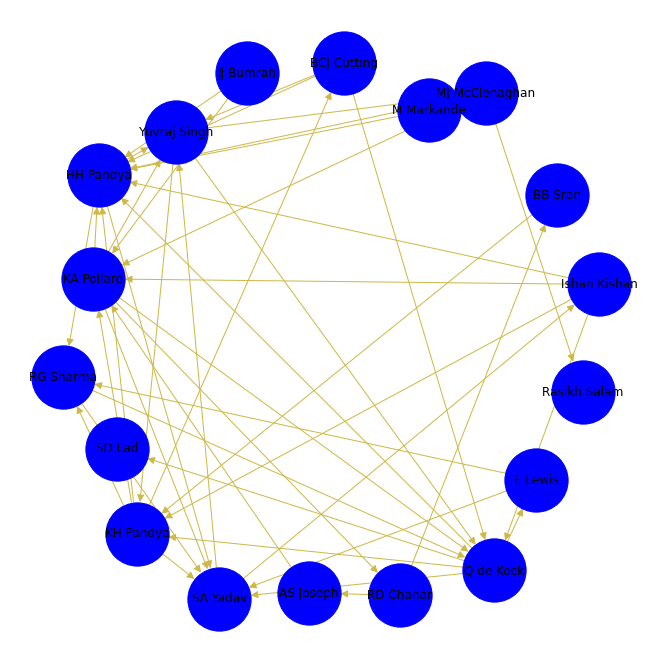

In [ ]:

plt.figure(figsize=(9,9))
pos = nx.spring_layout(G, k = 20, seed = 21) 
nx.draw(G, with_labels=True, node_color='blue', node_size=4000, pos = pos, edgelist=G.edges(), edge_color='#CEB847', arrowsize=15)
plt.show()

In [ ]:
sorted(G.degree, key=lambda x: x[1], reverse=True)


[('HH Pandya', 11),
 ('Q de Kock', 10),
 ('KA Pollard', 10),
 ('KH Pandya', 9),
 ('SA Yadav', 8),
 ('Yuvraj Singh', 7),
 ('RG Sharma', 5),
 ('MJ McClenaghan', 5),
 ('Ishan Kishan', 5),
 ('BCJ Cutting', 4),
 ('RD Chahar', 3),
 ('E Lewis', 3),
 ('M Markande', 2),
 ('JJ Bumrah', 2),
 ('AS Joseph', 2),
 ('BB Sran', 2),
 ('Rasikh Salam', 1),
 ('SD Lad', 1)]

In [ ]:
sorted(G.in_degree, key=lambda x: x[1], reverse=True)


[('HH Pandya', 8),
 ('SA Yadav', 6),
 ('Q de Kock', 5),
 ('KA Pollard', 5),
 ('Yuvraj Singh', 4),
 ('KH Pandya', 4),
 ('RG Sharma', 3),
 ('MJ McClenaghan', 2),
 ('BCJ Cutting', 1),
 ('Rasikh Salam', 1),
 ('Ishan Kishan', 1),
 ('RD Chahar', 1),
 ('AS Joseph', 1),
 ('SD Lad', 1),
 ('E Lewis', 1),
 ('BB Sran', 1),
 ('M Markande', 0),
 ('JJ Bumrah', 0)]

In [ ]:
sorted(G.out_degree, key=lambda x: x[1], reverse=True)


[('Q de Kock', 5),
 ('KA Pollard', 5),
 ('KH Pandya', 5),
 ('Ishan Kishan', 4),
 ('Yuvraj Singh', 3),
 ('HH Pandya', 3),
 ('BCJ Cutting', 3),
 ('MJ McClenaghan', 3),
 ('RG Sharma', 2),
 ('SA Yadav', 2),
 ('M Markande', 2),
 ('JJ Bumrah', 2),
 ('RD Chahar', 2),
 ('E Lewis', 2),
 ('AS Joseph', 1),
 ('BB Sran', 1),
 ('Rasikh Salam', 0),
 ('SD Lad', 0)]